<a href="https://colab.research.google.com/github/ShaziyaMemon26/Traffic-Data-Analysis/blob/main/Traffic_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.metrics import r2_score
from plotnine import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_excel('/content/drive/My Drive/uber.xlsx')
df

,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),AM Mean Travel Time (Seconds),PM Mean Travel Time (Seconds),Midday Mean Travel Time (Seconds),Evening Mean Travel Time (Seconds),Early Morning Mean Travel Time (Seconds)
0,2017-04-04 00:00:00,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2725,3197.0,2780.0,2615,3915,1552
1,2017-05-04 00:00:00,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2859,2955.0,2945.0,2719,4036,1383
2,2017-06-04 00:00:00,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2951,3336.0,2715.0,3078,3798,1483
3,2017-07-04 00:00:00,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2913,2857.0,2788.0,3411,3791,1559
4,2017-08-04 00:00:00,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2845,3180.0,2423.0,3100,3653,1468
...,...,...,...,...,...,...,...,...,...,...,...
816,02/24/2017,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2124,2452.0,2518.0,2041,2587,1537
817,02/25/2017,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2287,3061.0,2193.0,2313,2958,1481
818,02/26/2017,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",1966,2351.0,1952.0,2018,2446,1471
819,02/27/2017,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2322,3164.0,2684.0,2135,3111,1521


In [5]:
df.shape

(821, 11)

In [6]:
df.dtypes

Date                                         object
Origin Movement ID                            int64
Origin Display Name                          object
Destination Movement ID                       int64
Destination Display Name                     object
Daily Mean Travel Time (Seconds)              int64
AM Mean Travel Time (Seconds)               float64
PM Mean Travel Time (Seconds)               float64
Midday Mean Travel Time (Seconds)             int64
Evening  Mean Travel Time (Seconds)           int64
Early Morning Mean Travel Time (Seconds)      int64
dtype: object

In [7]:
df.nunique()

Date                                        821
Origin Movement ID                            1
Origin Display Name                           1
Destination Movement ID                       1
Destination Display Name                      1
Daily Mean Travel Time (Seconds)            596
AM Mean Travel Time (Seconds)               592
PM Mean Travel Time (Seconds)               624
Midday Mean Travel Time (Seconds)           624
Evening  Mean Travel Time (Seconds)         707
Early Morning Mean Travel Time (Seconds)    362
dtype: int64

In [8]:
df['Origin Display Name'].unique()

array(['Kempegowda, Majestic, Bengaluru, Karnataka'], dtype=object)

In [9]:
df['Destination Display Name'].unique()

array(['Analytics India Magazine, #280, 2nd floor, 5th Main, 15th A Cross Road, Sector 6, HSR Layout, Bengaluru, Karnataka'],
      dtype=object)

In [10]:
df.isnull().sum()

Date                                        0
Origin Movement ID                          0
Origin Display Name                         0
Destination Movement ID                     0
Destination Display Name                    0
Daily Mean Travel Time (Seconds)            0
AM Mean Travel Time (Seconds)               1
PM Mean Travel Time (Seconds)               1
Midday Mean Travel Time (Seconds)           0
Evening  Mean Travel Time (Seconds)         0
Early Morning Mean Travel Time (Seconds)    0
dtype: int64

In [11]:
df.fillna(df.mean(),inplace = True)

In [12]:
df.isnull().sum()

Date                                        0
Origin Movement ID                          0
Origin Display Name                         0
Destination Movement ID                     0
Destination Display Name                    0
Daily Mean Travel Time (Seconds)            0
AM Mean Travel Time (Seconds)               0
PM Mean Travel Time (Seconds)               0
Midday Mean Travel Time (Seconds)           0
Evening  Mean Travel Time (Seconds)         0
Early Morning Mean Travel Time (Seconds)    0
dtype: int64

In [13]:
df.describe()

,Origin Movement ID,Destination Movement ID,Daily Mean Travel Time (Seconds),AM Mean Travel Time (Seconds),PM Mean Travel Time (Seconds),Midday Mean Travel Time (Seconds),Evening Mean Travel Time (Seconds),Early Morning Mean Travel Time (Seconds)
count,821.0,821.0,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000
mean,100.0,171.0,2735.002436,3020.345122,2683.089024,2718.410475,3736.723508,1531.076736
std,0.0,0.0,350.883762,408.026017,485.720622,426.238435,722.773093,120.338710
min,100.0,171.0,1641.000000,1736.000000,1577.000000,1469.000000,1873.000000,1243.000000
25%,100.0,171.0,2551.000000,2812.000000,2259.000000,2430.000000,3357.000000,1455.000000
50%,100.0,171.0,2762.000000,3062.000000,2773.000000,2676.000000,3785.000000,1512.000000
75%,100.0,171.0,2946.000000,3261.000000,3027.000000,2916.000000,4153.000000,1588.000000
max,100.0,171.0,4283.000000,4509.000000,4271.000000,5876.000000,6736.000000,2152.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6afb79b9e8>,
      dtype=object)

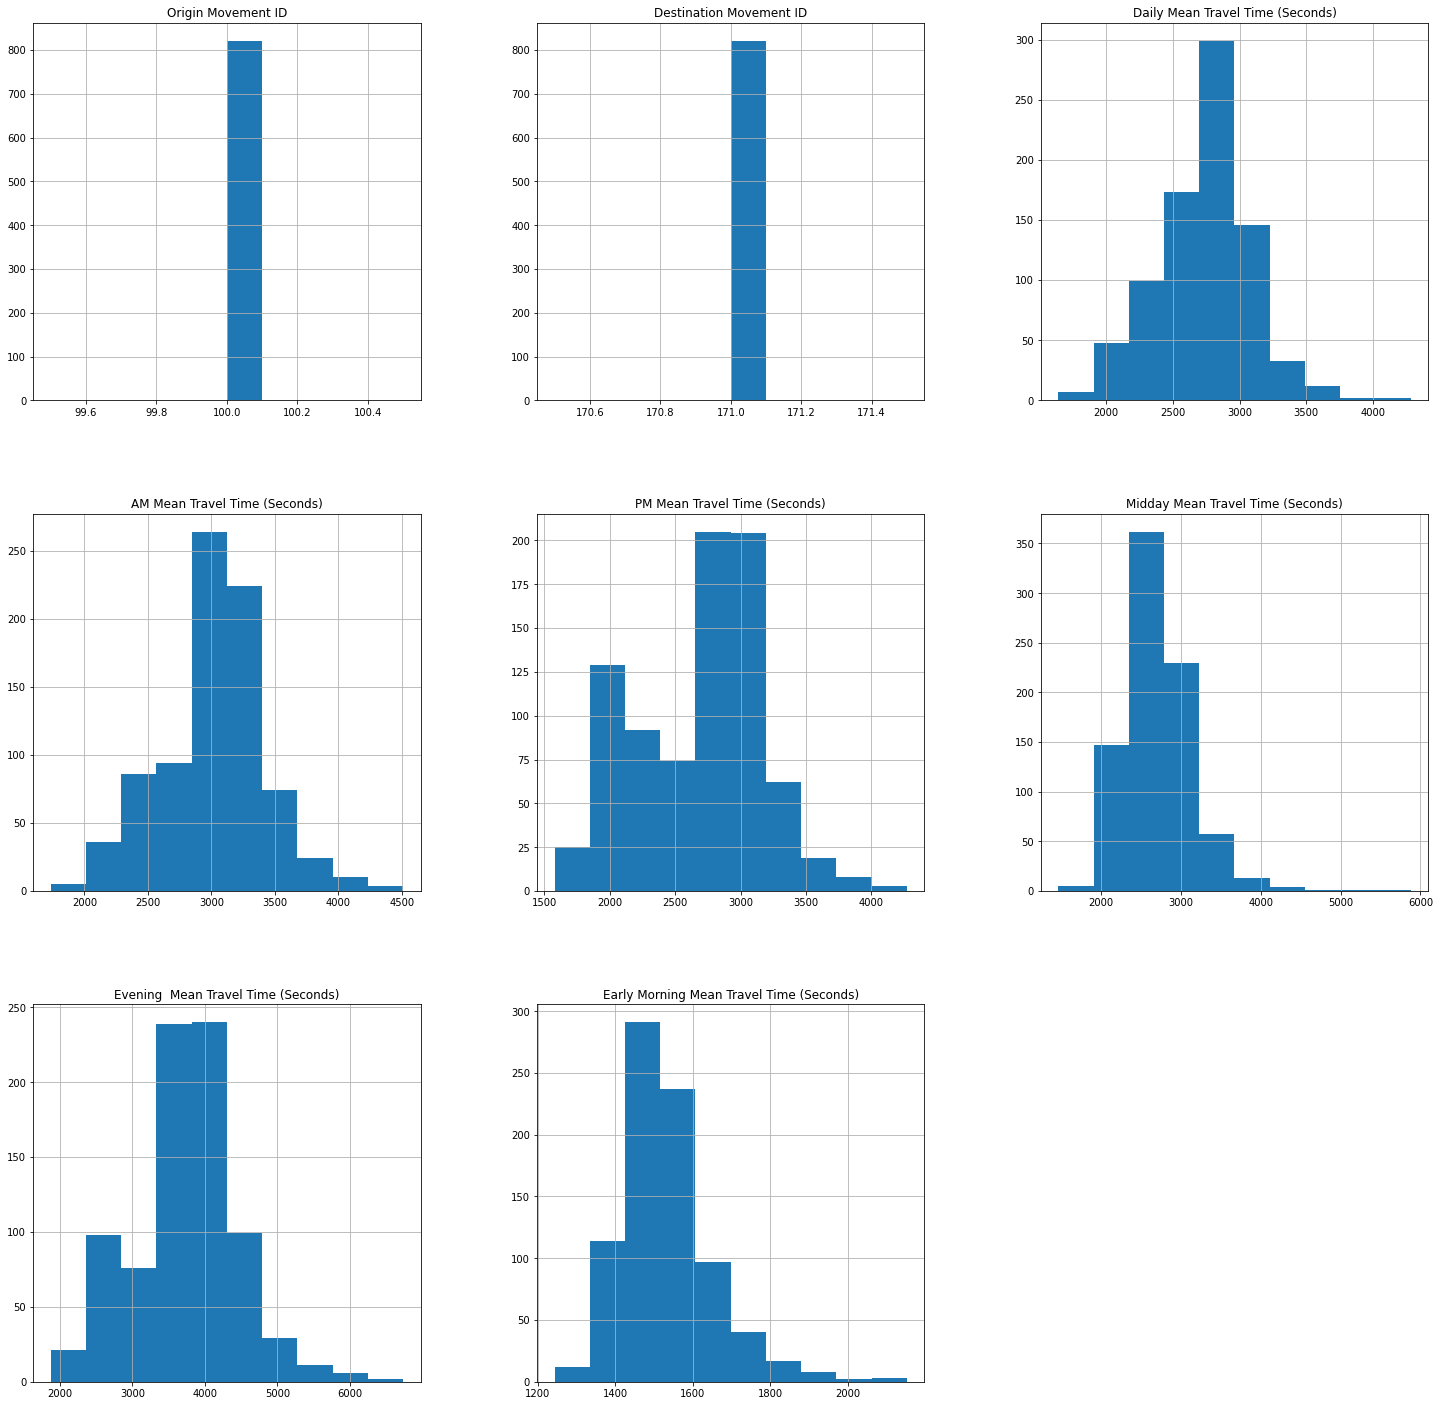

In [14]:
plt.rcParams['figure.figsize']=(25,25)
df.hist()

Text(0.5, 0, 'AM Mean Travel Time (Seconds)')

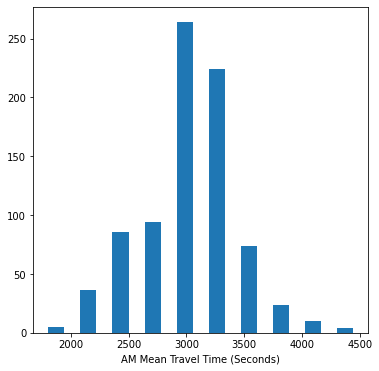

In [15]:
plt.rcParams['figure.figsize']=(6,6)
plt.hist(df['AM Mean Travel Time (Seconds)'],rwidth=0.5)
plt.xlabel('AM Mean Travel Time (Seconds)')

Text(0.5, 0, 'Early Morning Mean Travel Time (Seconds)')

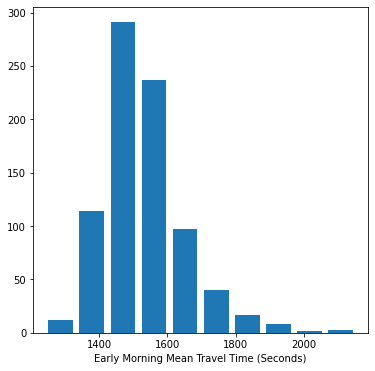

In [16]:
plt.rcParams['figure.figsize']=(6,6)
plt.hist(df['Early Morning Mean Travel Time (Seconds)'],rwidth=0.8)
plt.xlabel('Early Morning Mean Travel Time (Seconds)')

In [17]:
data = df.drop(columns= ['Origin Movement ID','Destination Movement ID','Destination Display Name','Origin Display Name','Daily Mean Travel Time (Seconds)'],axis=1).set_index('Date')

In [18]:
data1=data[810:]
data1

,AM Mean Travel Time (Seconds),PM Mean Travel Time (Seconds),Midday Mean Travel Time (Seconds),Evening Mean Travel Time (Seconds),Early Morning Mean Travel Time (Seconds)
Date,,,,,
02/18/2017,3337.0,2395.0,2589,3679,1536
02/19/2017,2512.0,2079.0,2279,2574,1493
02/20/2017,3093.0,3241.0,2536,3637,1474
02/21/2017,3064.0,3169.0,2433,3836,1531
02/22/2017,3257.0,2850.0,2421,3437,1551
02/23/2017,3147.0,2826.0,2524,3694,1378
02/24/2017,2452.0,2518.0,2041,2587,1537
02/25/2017,3061.0,2193.0,2313,2958,1481
02/26/2017,2351.0,1952.0,2018,2446,1471


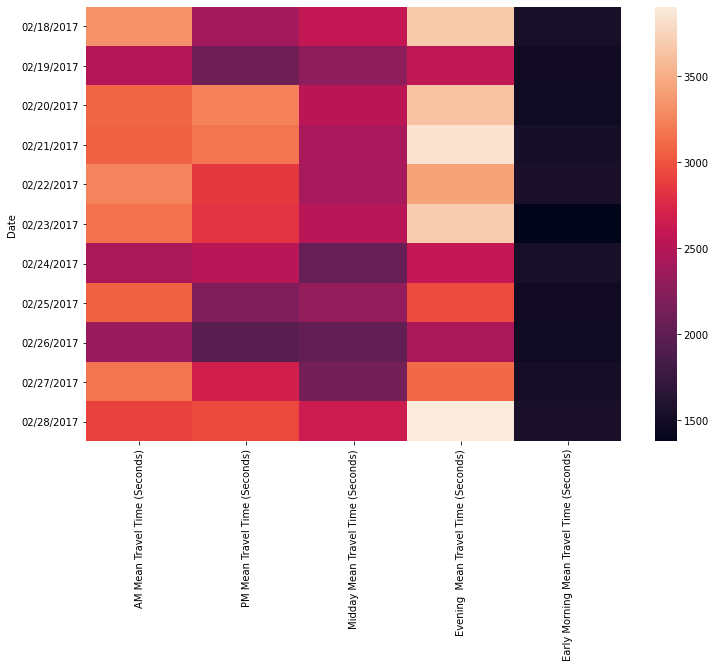

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(data1)

In [20]:
data2=df[14:20]
data2

,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),AM Mean Travel Time (Seconds),PM Mean Travel Time (Seconds),Midday Mean Travel Time (Seconds),Evening Mean Travel Time (Seconds),Early Morning Mean Travel Time (Seconds)
14,04/18/2017,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",3282,3735.0,3424.0,3283,3898,1578
15,04/19/2017,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",3139,3292.0,3233.0,3373,4420,1497
16,04/20/2017,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2963,3312.0,2977.0,2793,4281,1601
17,04/21/2017,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2954,3140.0,2809.0,2945,4548,1542
18,04/22/2017,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2972,3461.0,2244.0,2941,4189,1574
19,04/23/2017,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2336,2510.0,2098.0,2453,2748,1671


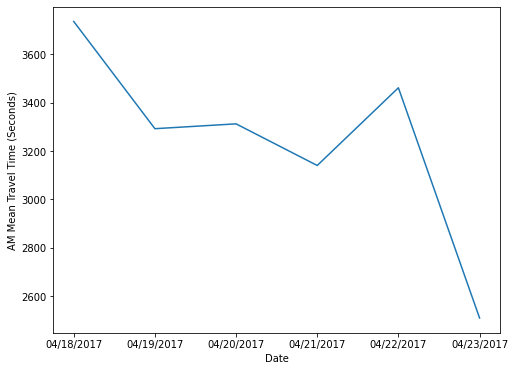

In [21]:
plt.rcParams['figure.figsize']=(8,6)
sns.lineplot(x='Date',y='AM Mean Travel Time (Seconds)',data=data2)

plt.show()

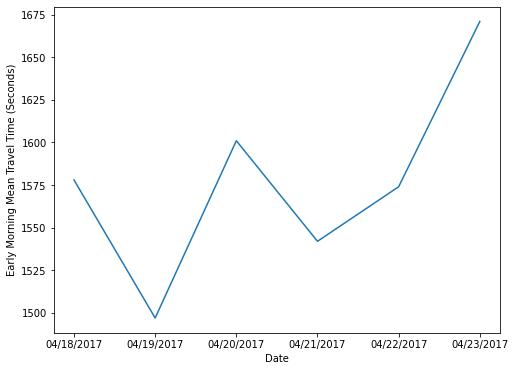

In [43]:
plt.rcParams['figure.figsize']=(8,6)
sns.lineplot(x='Date',y='Early Morning Mean Travel Time (Seconds)',data=data2)

plt.show()

In [40]:
data3=df[40:58]
data3

,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),AM Mean Travel Time (Seconds),PM Mean Travel Time (Seconds),Midday Mean Travel Time (Seconds),Evening Mean Travel Time (Seconds),Early Morning Mean Travel Time (Seconds)
40,05/14/2017,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2258,2329.0,1874.0,2387,2763,1479
41,05/15/2017,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2680,3026.0,2911.0,2747,3634,1587
42,05/16/2017,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2607,2928.0,2488.0,2694,3484,1602
43,05/17/2017,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2901,3017.0,2528.0,3081,3912,1585
44,05/18/2017,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2851,3111.0,2776.0,2903,4000,1572
45,05/19/2017,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2832,2802.0,2637.0,3150,3959,1481
46,05/20/2017,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2689,2989.0,2153.0,2909,3581,1592
47,05/21/2017,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2364,2337.0,2835.0,2260,2564,1857
48,05/22/2017,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2546,2992.0,2658.0,2500,3880,1551
49,05/23/2017,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2641,2880.0,2719.0,2832,3601,1501


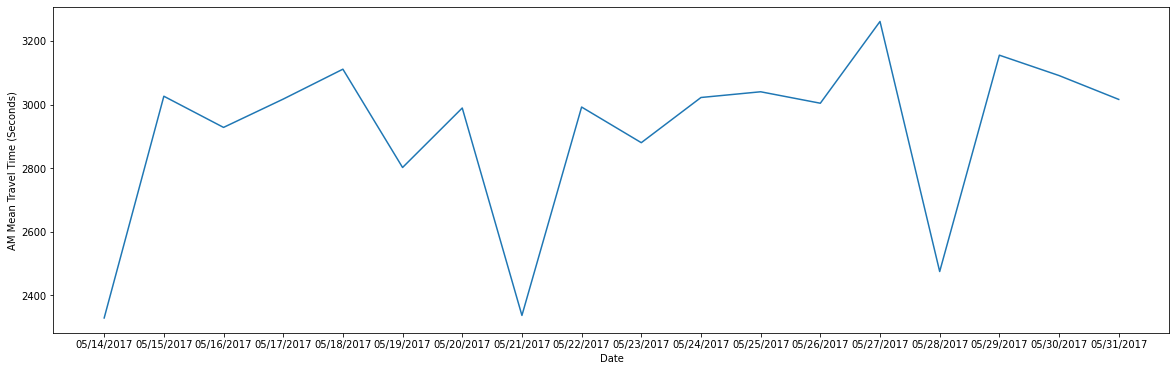

In [49]:
plt.rcParams['figure.figsize']=(20,6)
sns.lineplot(x="Date",y="AM Mean Travel Time (Seconds)",data=data3)

plt.show()

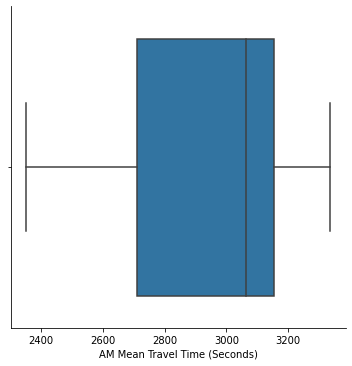

In [34]:
sns.catplot(x='AM Mean Travel Time (Seconds)', kind = 'box', data=data1)

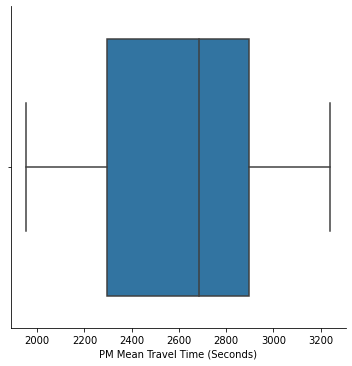

In [35]:
sns.catplot(x='PM Mean Travel Time (Seconds)', kind = 'box', data=data1)

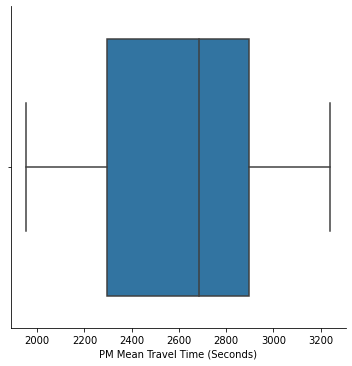

In [36]:
sns.catplot(x='PM Mean Travel Time (Seconds)', kind = 'box', data=data1)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


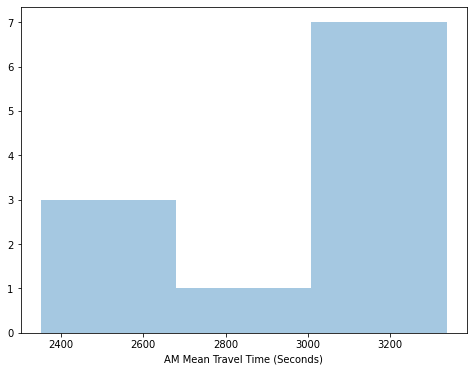

In [37]:
sns.distplot(data1['AM Mean Travel Time (Seconds)'], kde=False);

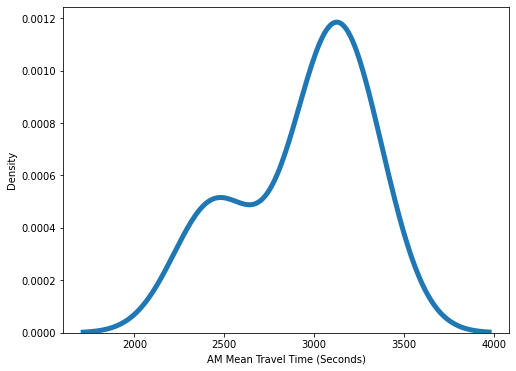

In [38]:
sns.kdeplot(data1['AM Mean Travel Time (Seconds)'], lw=5);

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


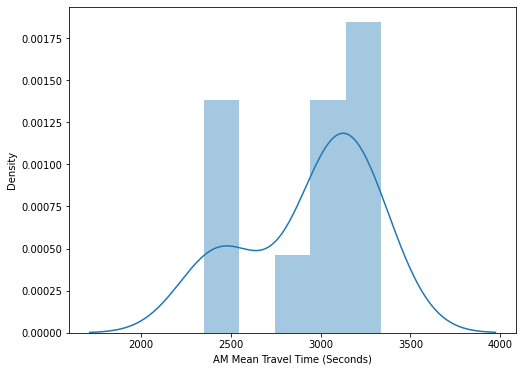

In [39]:

sns.distplot(data1['AM Mean Travel Time (Seconds)'], bins=5)